## Multipal Linear Regression

In [1]:
#carwale
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/Users/Admin.DESKTOP-Q9CVR13/Desktop/DataSet imarticus/PYTHON/Day 6 Linear Regression/homeprices1.csv")

In [3]:
df.head(5)

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [4]:
df.bedrooms.mean()

4.2

In [5]:
ndf = df.fillna(4.2)

In [6]:
ndf

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ndf.drop('price',axis='columns'),df.price)

LinearRegression()

In [8]:
reg.coef_

array([  116.66950551, 18756.28806982, -3675.75111708])

In [9]:
reg.intercept_

231586.00639409176

# FInd manually price of Home , with 3000 sqr ft , 3 bedrooms, 40 year old

In [10]:
116.66950551*3000+ 18756.28806982*3+ -3675.75111708*40 + 231586.00639409176

490833.3424503517

In [11]:
reg.predict([[3000,3,40]])

array([490833.34243748])

In [12]:
reg.predict([[2500,4,5]])

array([579906.16685223])

## Multipal Linear Regression  New

In [13]:
dataset = pd.read_csv("C:/Users/Admin.DESKTOP-Q9CVR13/Desktop/DataSet imarticus/PYTHON/Day 6 Linear Regression/advertising.csv")

In [14]:
dataset.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data Pre-Processing

In [15]:
dataset.shape

(200, 4)

In [16]:
dataset.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

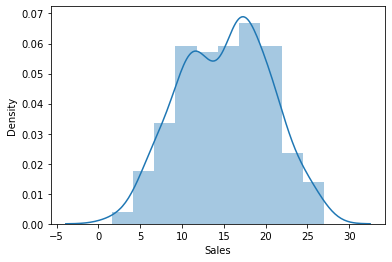

In [17]:
sns.distplot(dataset['Sales'])

# How sales are related with other variable

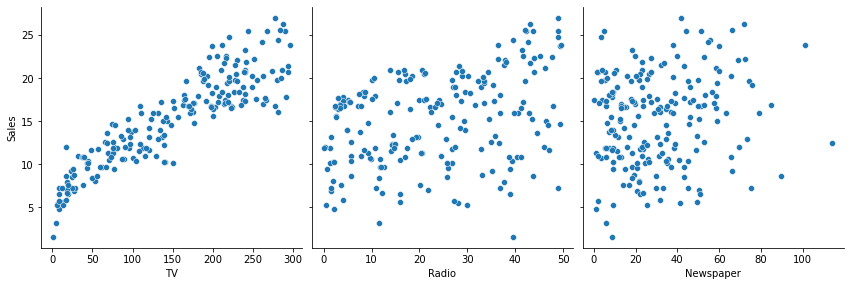

In [18]:
sns.pairplot(dataset,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=4,aspect=1,kind='scatter')

# Tv is strongly , Positive linear with target variable

3. Heatmap

<AxesSubplot:>

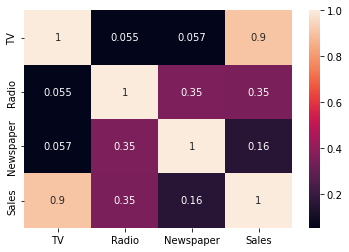

In [19]:
sns.heatmap(dataset.corr(),annot = True)
# Tv seems to me most co related

## Model Building

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [21]:
x = dataset[['TV','Radio','Newspaper']]
y = dataset['Sales']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=100)

In [23]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [24]:
import statsmodels.api as sm
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())
# calculating p value

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     461.2
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           4.73e-71
Time:                        14:30:58   Log-Likelihood:                -270.60
No. Observations:                 140   AIC:                             549.2
Df Residuals:                     136   BIC:                             561.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3346      0.357     12.139      0.0

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
print(mlr.intercept_) #priting the model intercept

4.334595861728431


In [26]:
list(zip(x,mlr.coef_)) # name with cofficents

[('TV', 0.053829108667250075),
 ('Radio', 0.11001224388558054),
 ('Newspaper', 0.006289950146130339)]

In [27]:
y_pred_mlr = mlr.predict(x_test)

In [28]:
print("Prediction for test set : {}".format(y_pred_mlr))

Prediction for test set : [ 9.35221067 20.96344625 16.48851064 20.10971005 21.67148354 16.16054424
 13.5618056  15.39338129 20.81980757 21.00537077 12.29451311 20.70848608
  8.17367308 16.82471534 10.48954832  9.99530649 16.34698901 14.5758119
 17.23065133 12.56890735 18.55715915 12.12402775 20.43312609 17.78017811
 16.73623408 21.60387629 20.13532087 10.82559967 19.12782848 14.84537816
 13.13597397  9.07757918 12.07834143 16.62824427  8.41792841 14.0456697
  9.92050209 14.26101605 16.76262961 17.17185467 18.88797595 15.50165469
 15.78688377 16.86266686 13.03405813 10.47673934 10.6141644  20.85264977
 10.1517568   6.88471443 17.88702583 18.16013938 12.55907083 16.28189561
 18.98024679 11.33714913  5.91026916 10.06159509 17.62383031 13.19628335]


In [29]:
mlr_diff = pd.DataFrame({'Actual Value': y_test,'Predicted Value': y_pred_mlr,})
mlr_diff # Showing Actual and predicted

,Actual Value,Predicted Value
126,6.6,9.352211
104,20.7,20.963446
99,17.2,16.488511
92,19.4,20.109710
111,21.8,21.671484
167,17.2,16.160544
116,12.2,13.561806
96,16.7,15.393381
52,22.6,20.819808
69,22.3,21.005371


In [30]:
mlr.predict([[56,55,67]]) #predicting any value 

array([13.82112602])

In [31]:
y_pred_mlr.shape

(60,)

In [32]:
mlr.score(x,y)*100 # R sqaure value #its explain how better is yr model it between 0 and 1

90.11059550107375

In [33]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred_mlr)) 

Mean Absolute Error: 1.227818356658941


In [34]:
from sklearn import metrics  
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred_mlr)) 

Mean Squared Error: 2.6360765623280655


In [35]:
x_test.shape

(60, 3)

In [36]:
y_pred_mlr.shape

(60,)

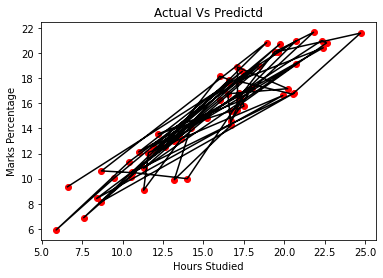

In [37]:
plt.scatter(x= y_test, y = y_pred_mlr , color = 'red')
plt.plot(y_test, y_pred_mlr, color = 'black')
plt.title('Actual Vs Predictd')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Percentage')
plt.show()